In [56]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',None)

In [3]:
df= pd.read_csv('datasets/drugsComTrain_raw.tsv',sep='\t')

In [4]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [5]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [7]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='Acne') | (df['condition']=='Insomnia') | (df['condition']=='Weight Loss') | (df['condition']=='Diabetes, Type 2') | (df['condition']=='High Blood Pressure') | (df['condition']=='Migraine') | (df['condition']=='Chronic Pain') | (df['condition']=='Bacterial Infection') | (df['condition']=='Cough') |(df['condition']=='Motion Sickness') |(df['condition']=='Allergies') | (df['condition']=='Dry Eye Disease') | (df['condition']=='Diabetes, Type 1') | (df['condition']=='Period Pain') | (df['condition']=='Diarrhea') ]

In [8]:
df.shape

(161297, 7)

In [9]:
df_train.shape

(61541, 7)

In [10]:
X = df_train.drop(['Unnamed: 0','drugName', 'rating', 'date', 'usefulCount'],axis=1)

## EDA

In [11]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Acne                    5588
Insomnia                3673
Weight Loss             3609
Diabetes, Type 2        2554
High Blood Pressure     2321
Migraine                1694
Chronic Pain            1455
Bacterial Infection      945
Cough                    927
Motion Sickness          203
Allergies                179
Dry Eye Disease          147
Diabetes, Type 1         140
Period Pain              139
Diarrhea                 110
Name: count, dtype: int64

In [13]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
13          Cough  "Have a little bit of a lingering cough from a...

In [14]:
X_birth= X[(X['condition'] == 'Birth Control')]
X_dep= X[(X['condition'] == 'Depression')]
X_acn= X[(X['condition'] == 'Acne')]
X_ins= X[(X['condition'] == 'Insomnia')]
X_wl= X[(X['condition'] == 'Weight Loss')]
X_d2= X[(X['condition'] == 'Diabetes, Type 2')]
X_bp= X[(X['condition'] == 'High Blood Pressure')]
X_mig= X[(X['condition'] == 'Migraine')]
X_cp= X[(X['condition'] == 'Chronic Pain')]
X_bi= X[(X['condition'] == 'Bacterial Infection')]
X_cgh= X[(X['condition'] == 'Cough')]
X_ms= X[(X['condition'] == 'Motion Sickness')]
X_alg= X[(X['condition'] == 'Allergies')]
X_ded= X[(X['condition'] == 'Dry Eye Disease')]
X_d1= X[(X['condition'] == 'Diabetes, Type 1')]
X_pp= X[(X['condition'] == 'Period Pain')]
X_dia= X[(X['condition'] == 'Diarrhea')]

Text(0.5, 1.0, 'Word Cloud for Birth Control')

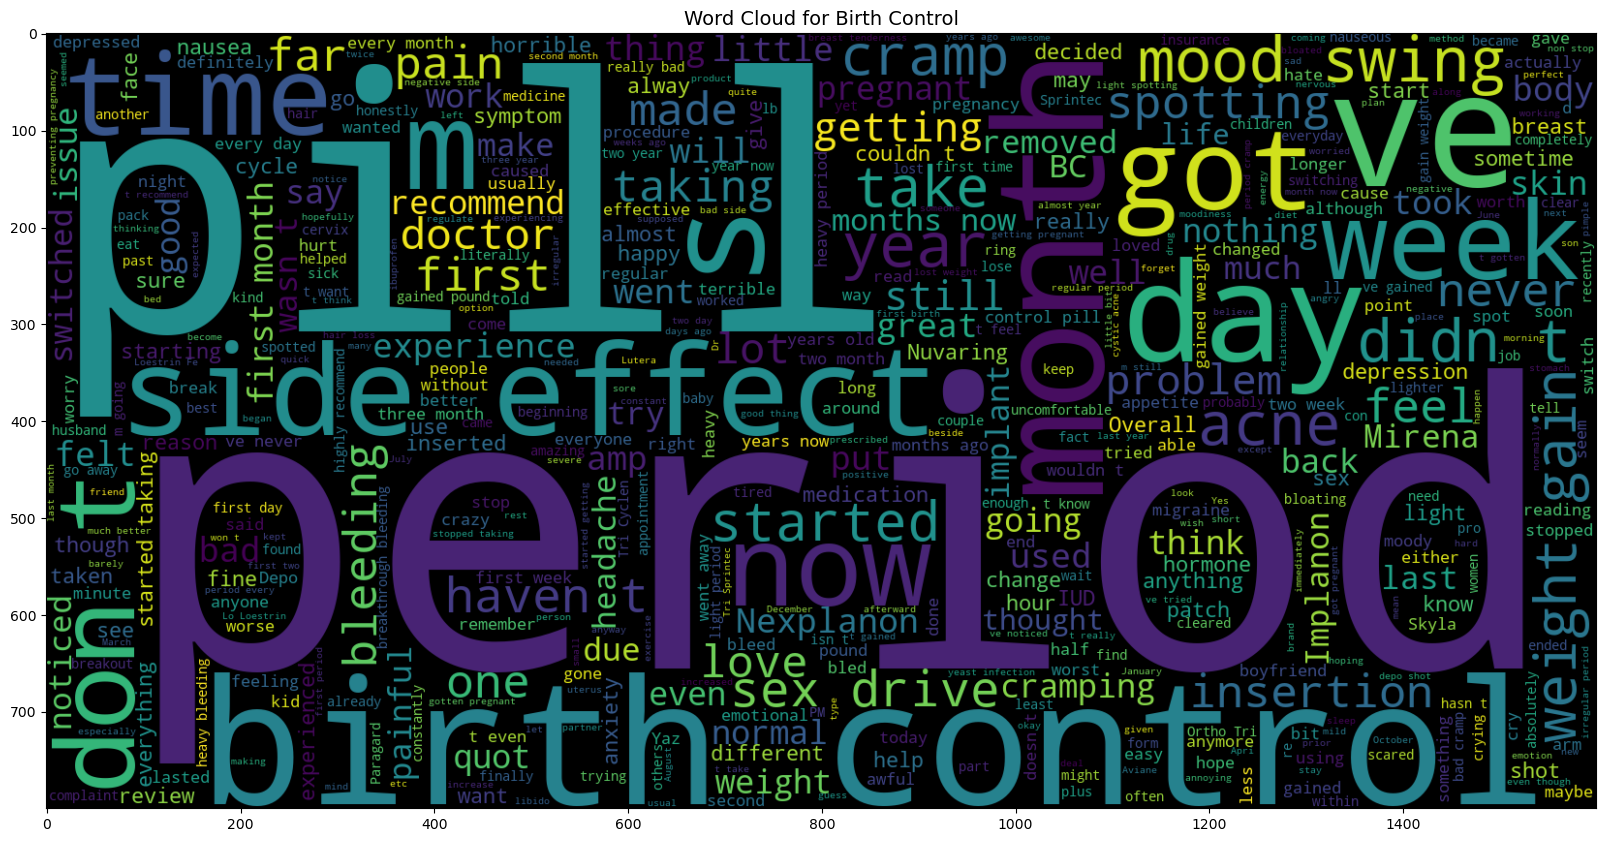

In [19]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
wc= WordCloud(max_words=500, width =1600, height =800).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation ='bilinear')
plt.title('Word Cloud for Birth Control', fontsize=14)

Text(0.5, 1.0, 'Word Cloud for Depression')

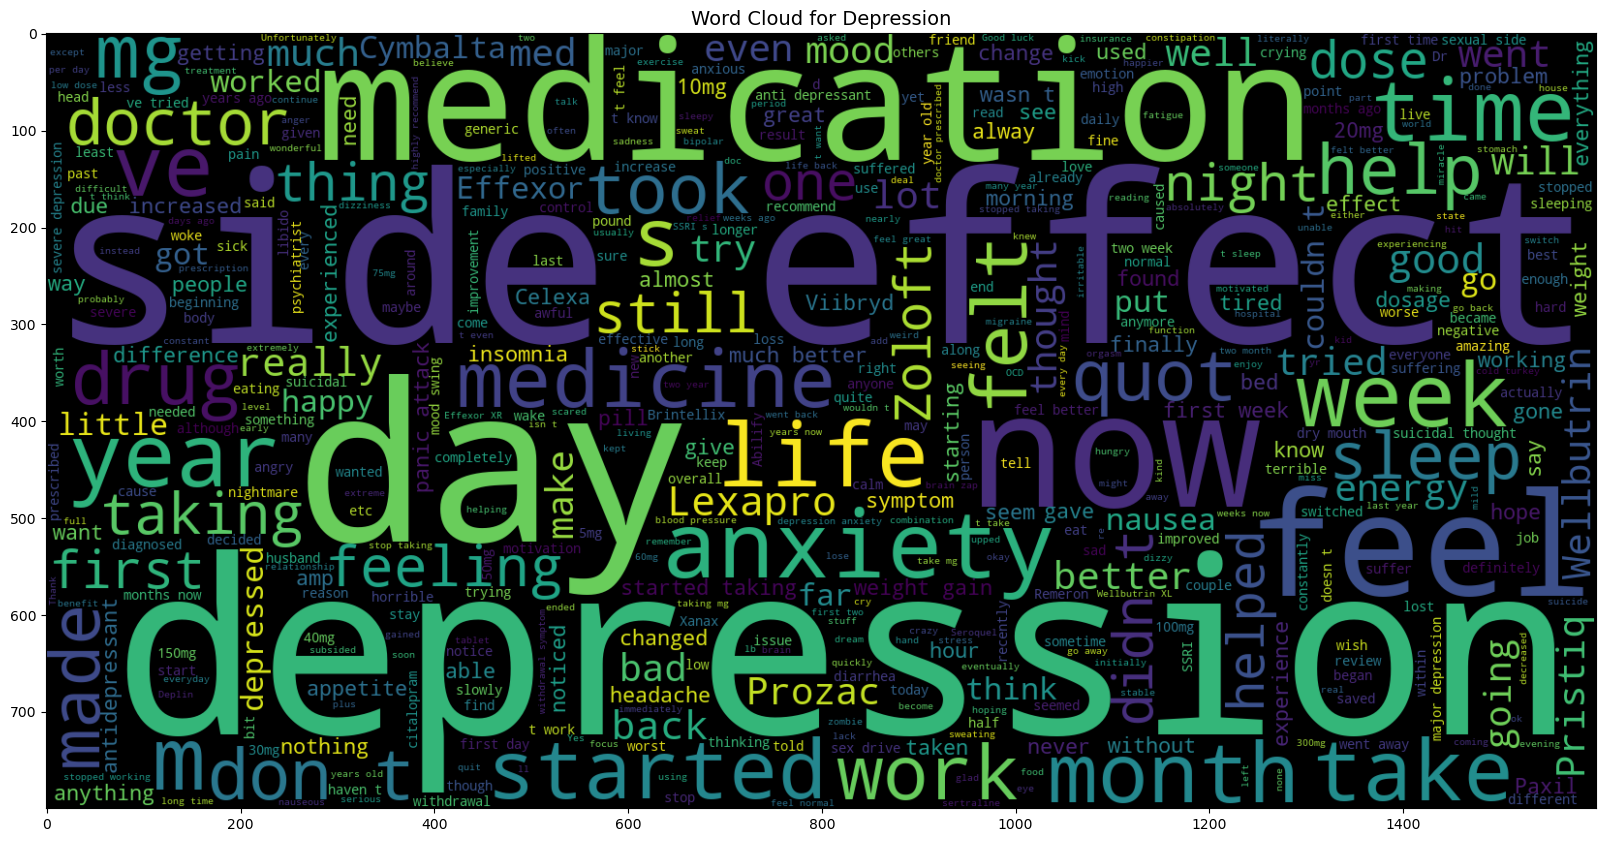

In [21]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
wc= WordCloud(max_words=500, width =1600, height =800).generate(" ".join(X_dep.review))
plt.imshow(wc, interpolation ='bilinear')
plt.title('Word Cloud for Depression', fontsize=14)

Text(0.5, 1.0, 'Word Cloud for Acne')

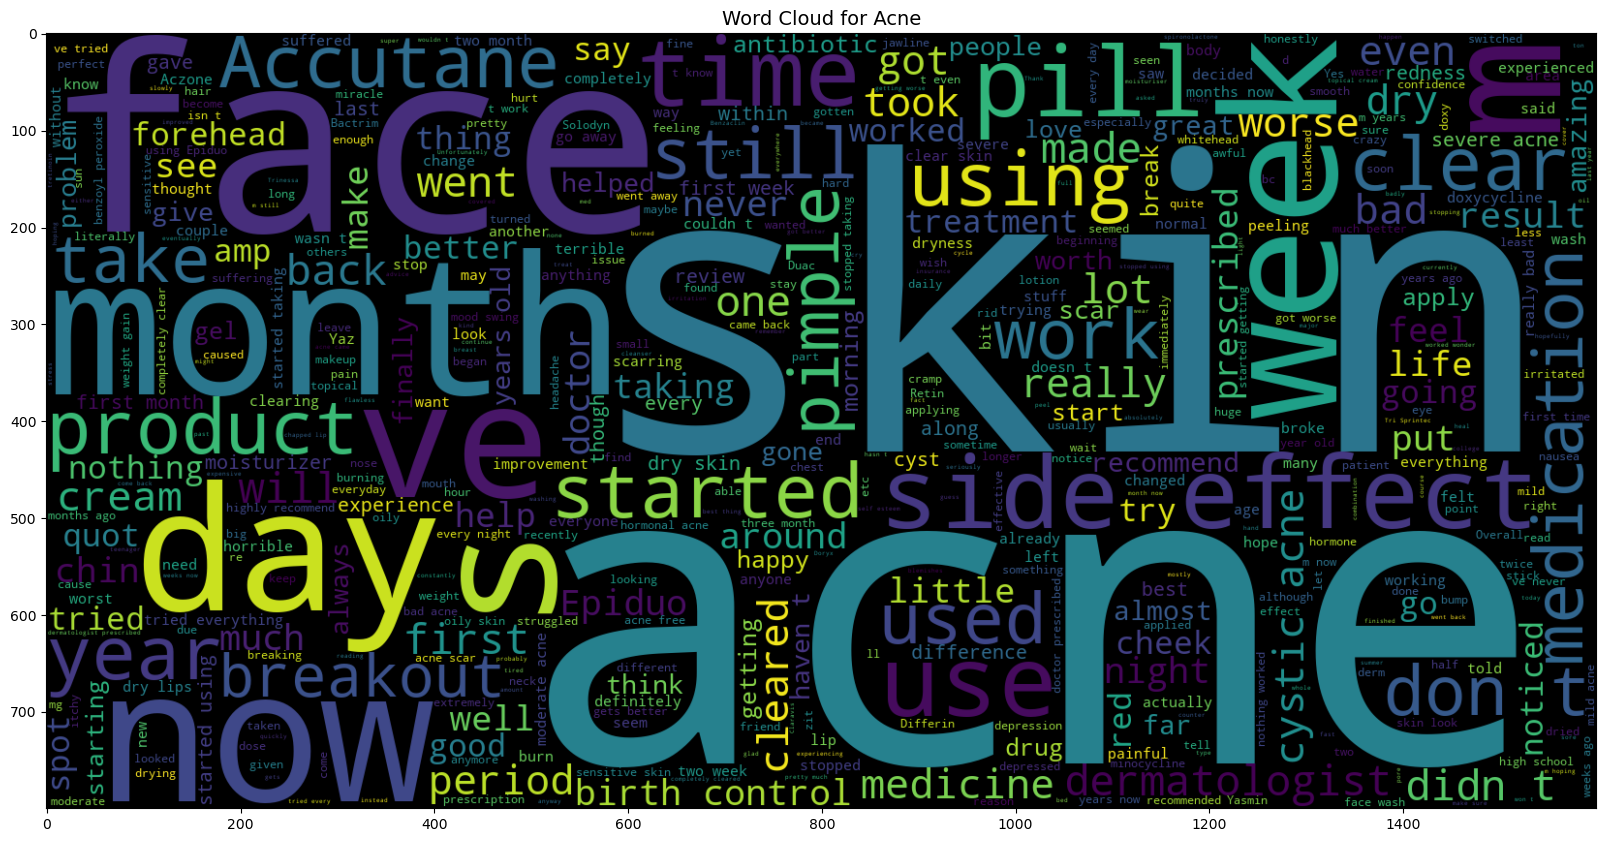

In [22]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
wc= WordCloud(max_words=500, width =1600, height =800).generate(" ".join(X_acn.review))
plt.imshow(wc, interpolation ='bilinear')
plt.title('Word Cloud for Acne', fontsize=14)

Text(0.5, 1.0, 'Word Cloud for Insomnia')

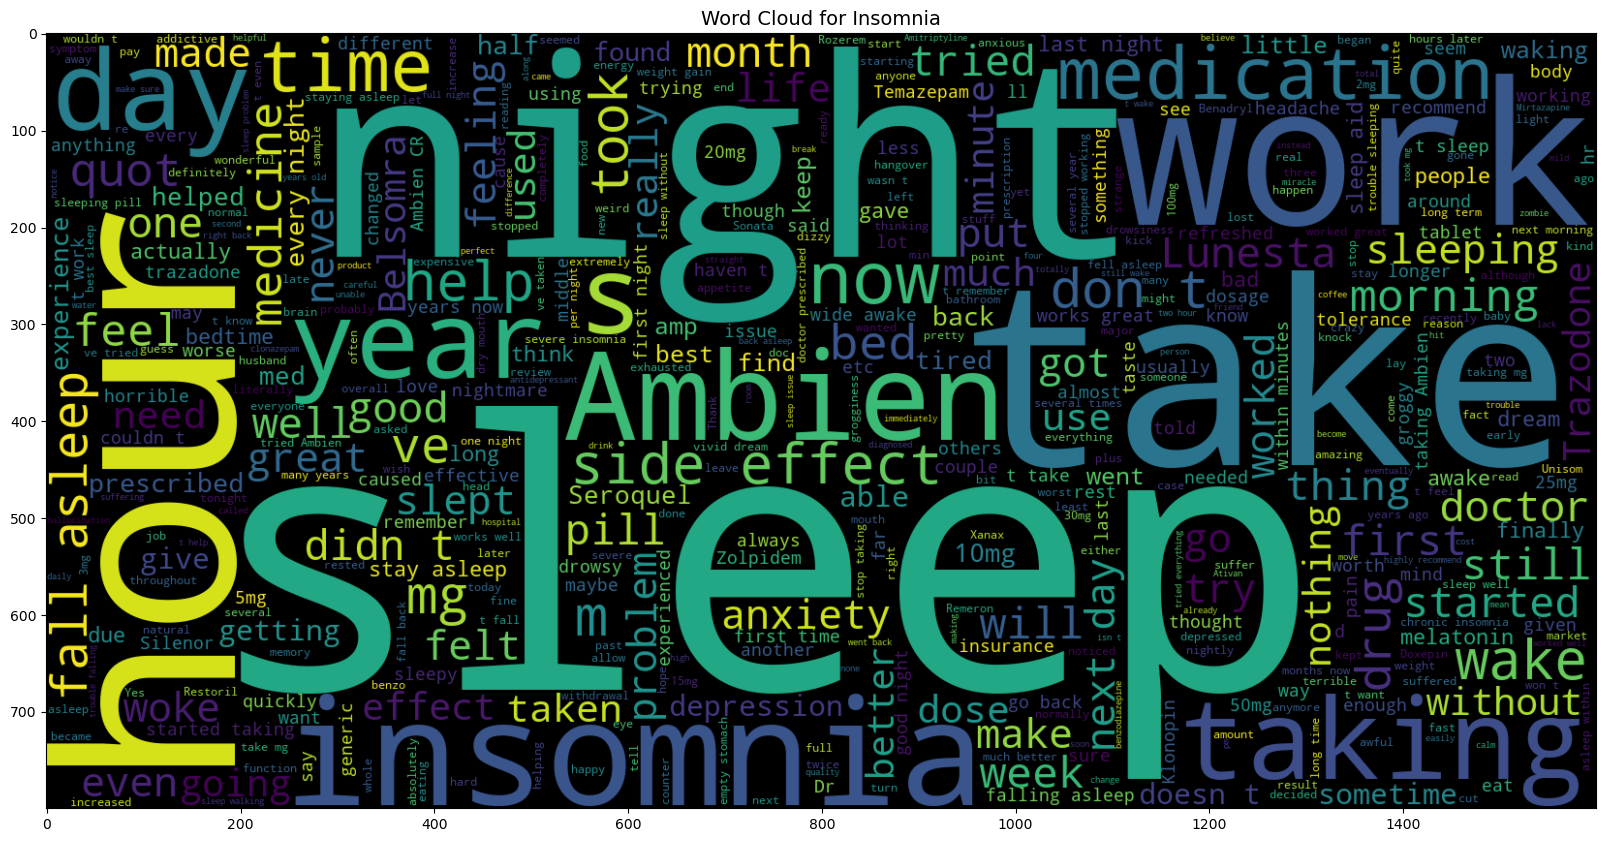

In [23]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
wc= WordCloud(max_words=500, width =1600, height =800).generate(" ".join(X_ins.review))
plt.imshow(wc, interpolation ='bilinear')
plt.title('Word Cloud for Insomnia', fontsize=14)

Text(0.5, 1.0, 'Word Cloud for Diabetes Type 2')

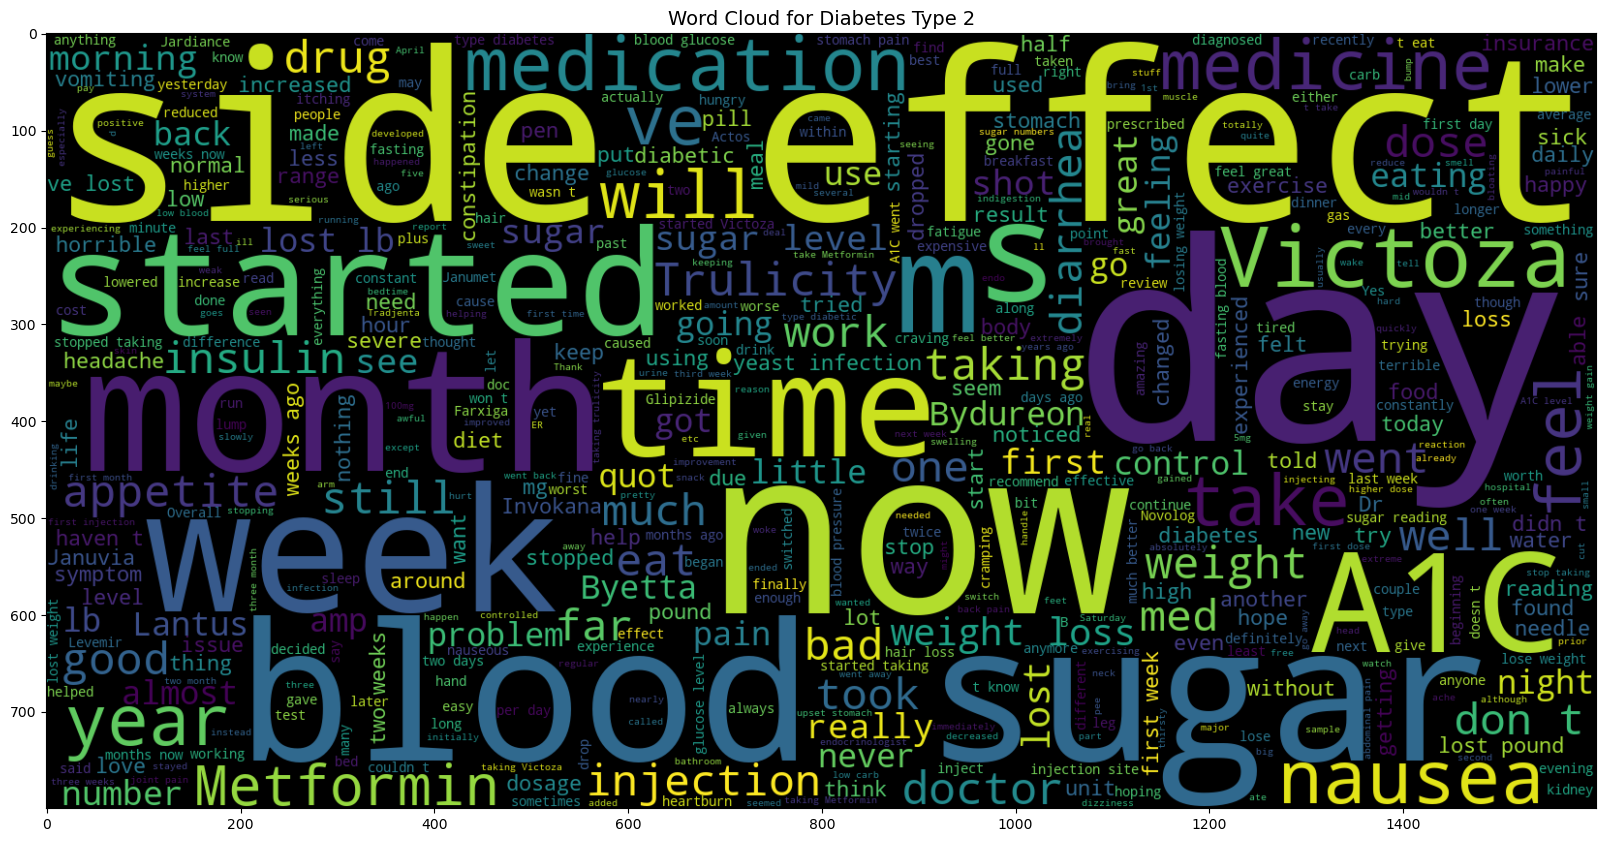

In [24]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
wc= WordCloud(max_words=500, width =1600, height =800).generate(" ".join(X_d2.review))
plt.imshow(wc, interpolation ='bilinear')
plt.title('Word Cloud for Diabetes Type 2', fontsize=14)

## Data Preprocessing

In [25]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [26]:
for i, col in enumerate(X.columns):
    X.iloc[:,i] = X.iloc[:,i].str.replace('"','')

In [29]:
pd.set_option('max_colwidth',None)

In [30]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
13          Cough   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3                                                                                                                                                                                                                                                                                                                        This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch  
9                       I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.  
11                                                                                                                                                                                                                                                                                                   I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.  
13                                                                     

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shristi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [34]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Lemmitization

In [36]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [37]:
from bs4 import BeautifulSoup
import re

In [41]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]',' ', review_text)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stop]
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    return(' '.join(lemmitize_words))

In [44]:
X['review_clean']=X['review'].apply(review_to_words)

C:\Users\Shristi\AppData\Local\Temp\ipykernel_12200\3309196613.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [45]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
13          Cough   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  \
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                        This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
9                       I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.   
11                                                                                                                                                                                                                                                                                                   I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.   
13                                                                

In [46]:
X_feat= X['review_clean']
y = X['condition']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, stratify= y, test_size=0.2, random_state=0)

In [54]:
def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize =(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation =45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix with normalization")
        
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True_label')
    plt.xlabel('Predicted label')

## Bag of Words

In [49]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## Naive Bayes

accuracy: 0.914
Confusion matrix with normalization


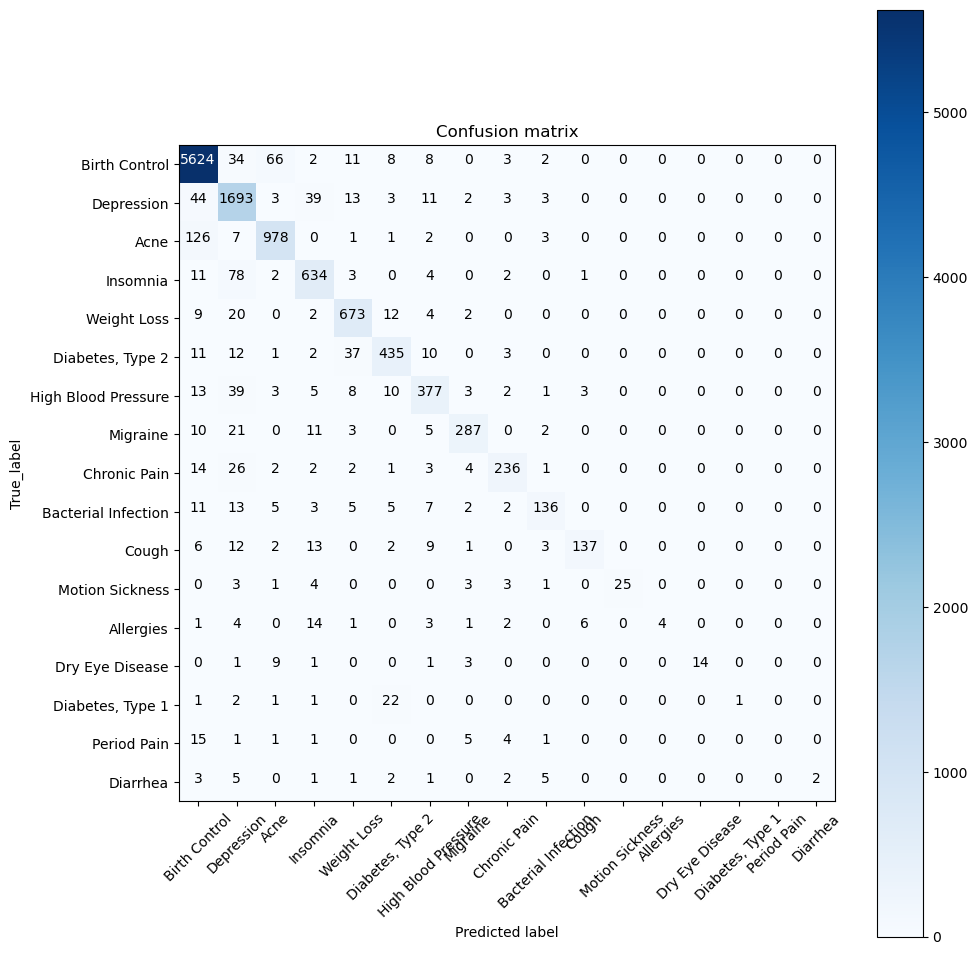

In [55]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm= metrics.confusion_matrix(y_test, pred, labels=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])

## Passive Aggressive Classifier

Accuracy : 0.940
Confusion matrix with normalization


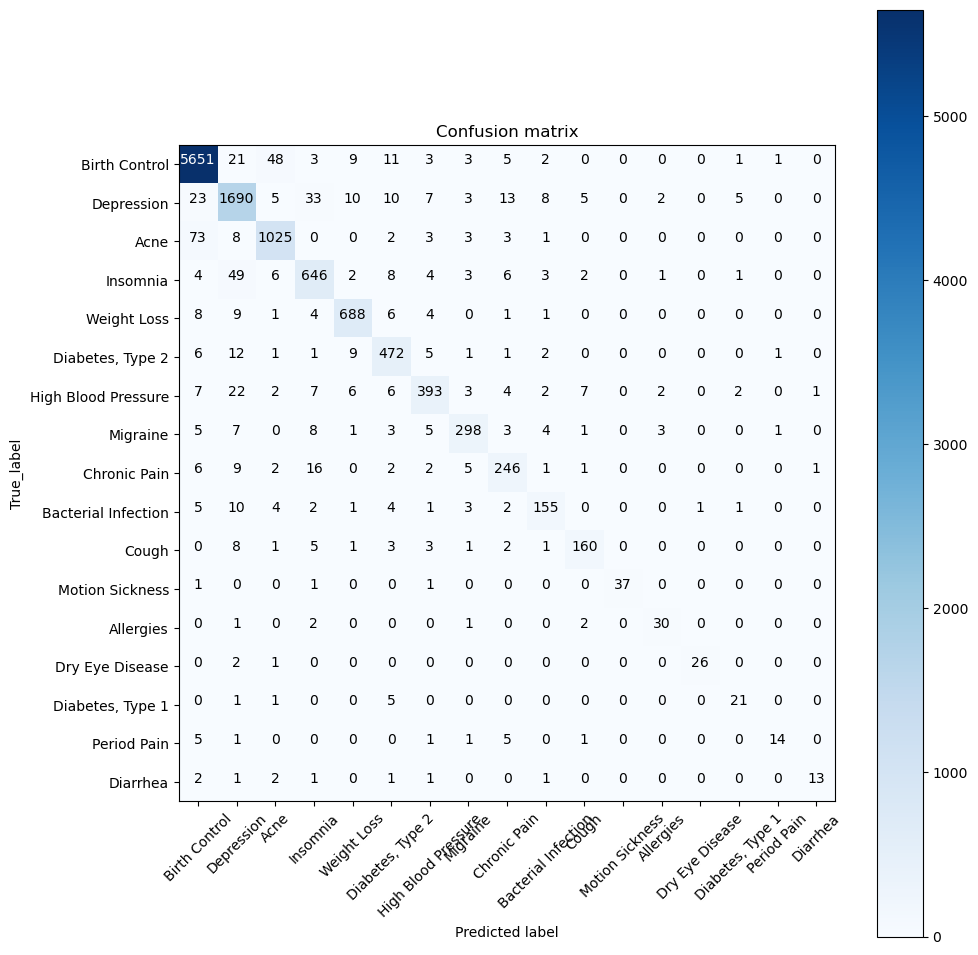

In [58]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])

## TF-IDF

In [64]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## Naive Bayes

accuracy: 0.776
Confusion matrix with normalization


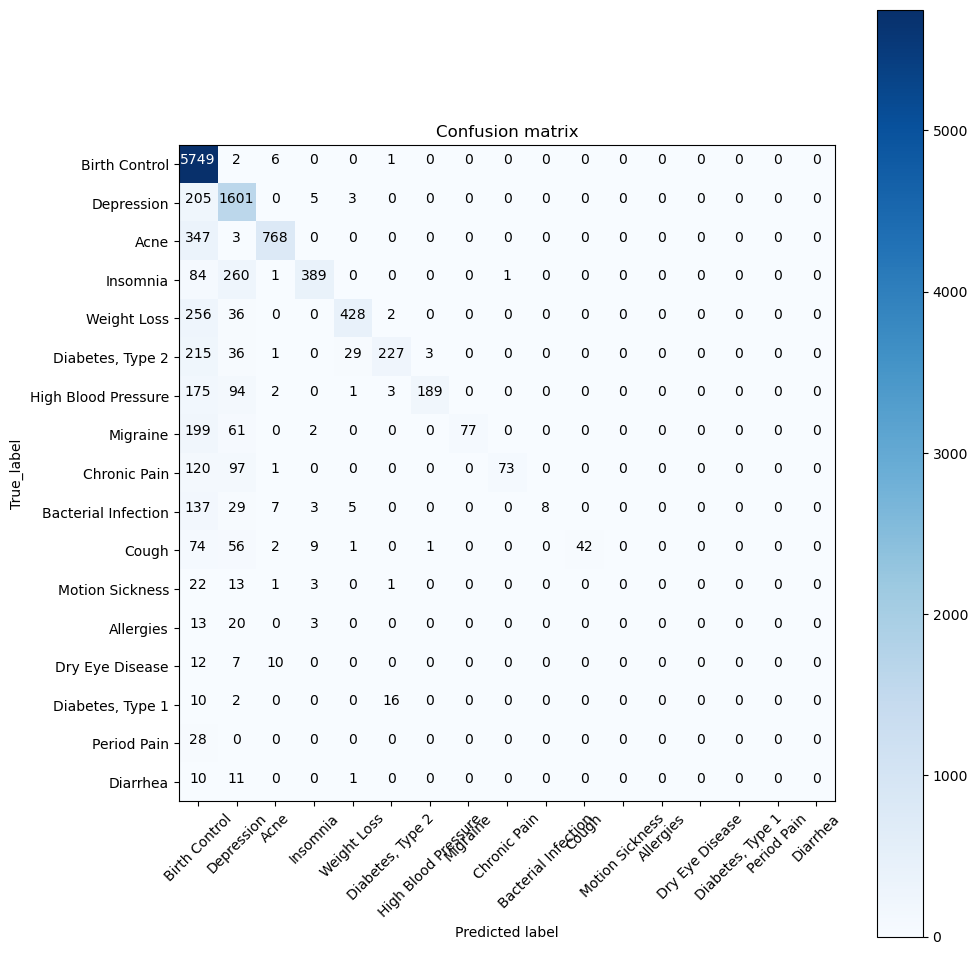

In [65]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, y_train)
pred = mnb_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm= metrics.confusion_matrix(y_test, pred, labels=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])

## Passive Aggressive

Accuracy : 0.949
Confusion matrix with normalization


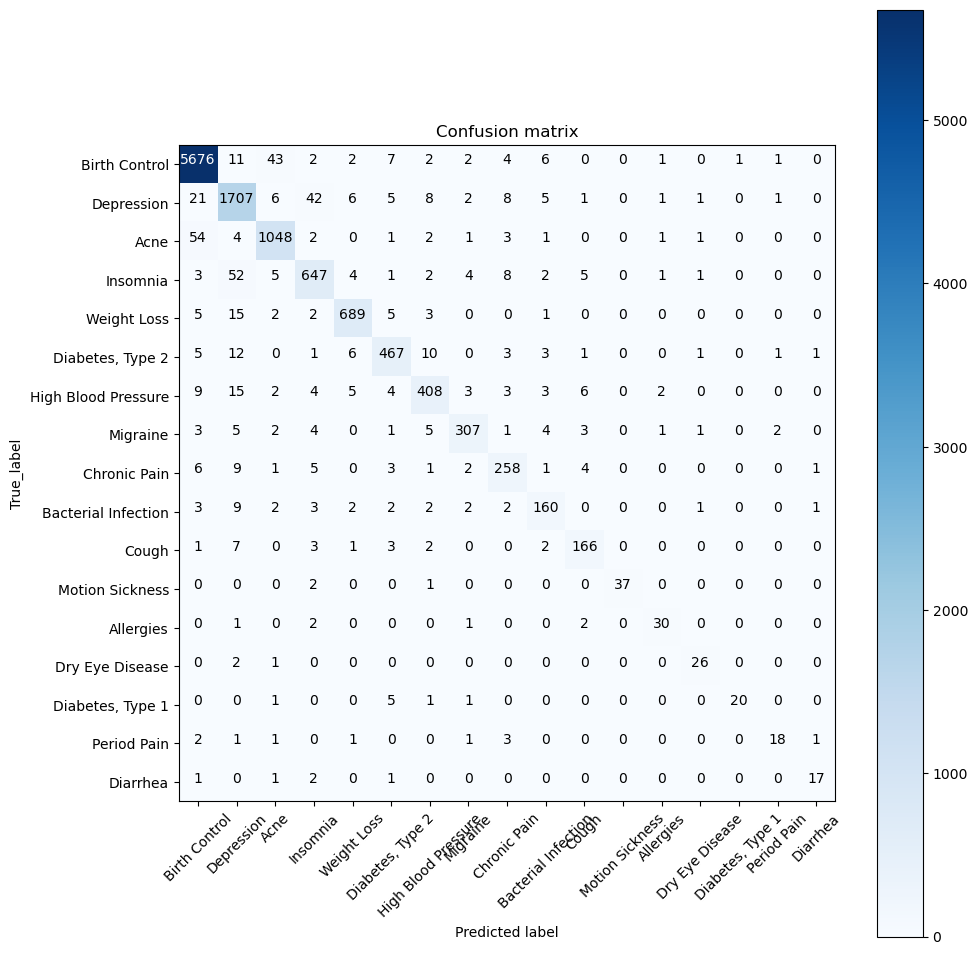

In [76]:
passive_tf = PassiveAggressiveClassifier()
passive_tf.fit(tfidf_train, y_train)
pred = passive_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])

## TF-IDF Bigrams

In [67]:
tfidf_vectorizer_2 = TfidfVectorizer(stop_words='english',max_df=0.8, ngram_range=(1,2))
tfidf_train_2= tfidf_vectorizer_2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer_2.transform(X_test)

Accuracy : 0.963
Confusion matrix with normalization


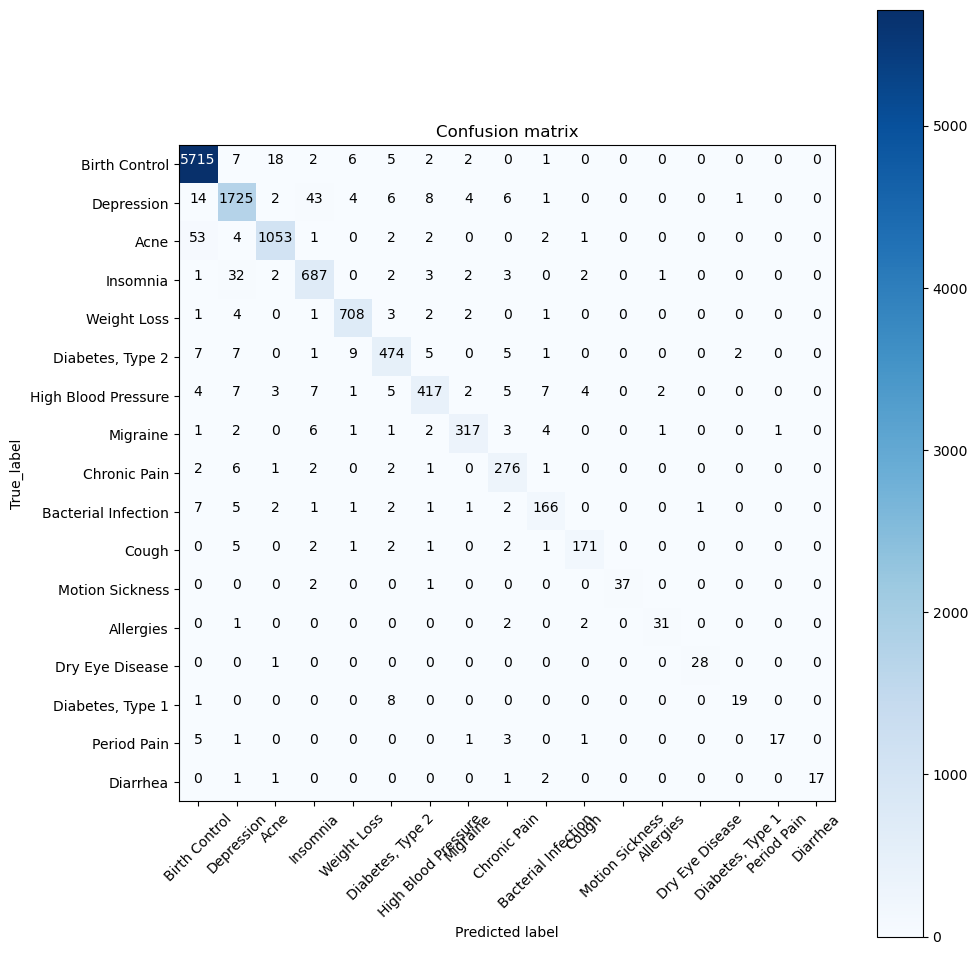

In [78]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Acne','Insomnia','Weight Loss','Diabetes, Type 2','High Blood Pressure','Migraine','Chronic Pain','Bacterial Infection','Cough','Motion Sickness','Allergies','Dry Eye Disease','Diabetes, Type 1','Period Pain','Diarrhea'])

## Prediction

In [80]:
text = ["I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. "]
test = tfidf_vectorizer_2.transform(text)
pred_1=pass_tf.predict(test)[0]
pred_1

'Birth Control'

## Saving Model

In [81]:
import joblib
joblib.dump(tfidf_vectorizer_2, 'tfidf_vectorizer.pkl')
joblib.dump(pass_tf,'passmodel.pkl')

['passmodel.pkl']

In [82]:
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('passmodel.pkl')

test= model.predict(vectorizer.transform(["I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."]))
test[0]

'Depression'

## Recommendation

In [84]:
sentences =[
    "This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(",
    "Used with my throat cancer and it helped numb my throat to be able to eat. I lost 200 pounds but this helped me survive and be able to eat most foods... Soft ones anyway... I know opioids are a bitch but without these I would have died of starvation",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.	"
]

In [86]:
tfidf_bigram = tfidf_vectorizer_2.transform(sentences)
predictions = pass_tf.predict(tfidf_bigram)
for text, label in zip(sentences,predictions):
    if label == "Birth Control":
        target == "Birth Control"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Depression":
        target == "Depression"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Acne":
        target == "Acne"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Insomnia":
        target == "Insomnia"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Weight Loss":
        target == "Weight Loss"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Diabetes, Type 2":
        target == "Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "High Blood Pressure":
        target == "High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Migraine":
        target == "Migraine"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Chronic Pain":
        target == "Chronic Pain"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Bacterial Infection":
        target == "Bacterial Infection"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Cough":
        target == "Cough"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Motion Sickness":
        target == "Motion Sickness"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Allergies":
        target == "Allergies"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Dry Eye Disease":
        target == "Dry Eye Disease"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Diabetes, Type 1":
        target == "Diabetes, Type 1"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Period Pain":
        target == "Period Pain"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label == "Diarrhea":
        target == "Diarrhea"
        top_drugs = top_drugs_extractor(label)
        print("text: ",text,"\nCondition: ",target)
        print("Top 3 Suggested Medicine / Drugs :",target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

NameError: name 'target' is not defined